In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv('titanic.csv')

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [66]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [67]:
df = pd.get_dummies(df,drop_first=True)

In [68]:
df

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [69]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Sex_male      0
dtype: int64

In [70]:
import math
df['Age'] = df['Age'].fillna(math.floor(df['Age'].mean()))
df.head(10)

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
5,0,3,29.0,8.4583,1
6,0,1,54.0,51.8625,1
7,0,3,2.0,21.0750,1
8,1,3,27.0,11.1333,0
9,1,2,14.0,30.0708,0


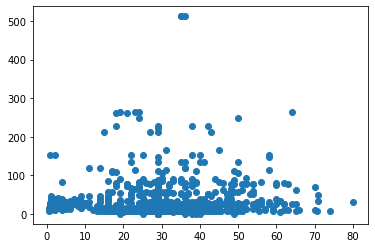

In [71]:
plt.scatter(df['Age'],df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

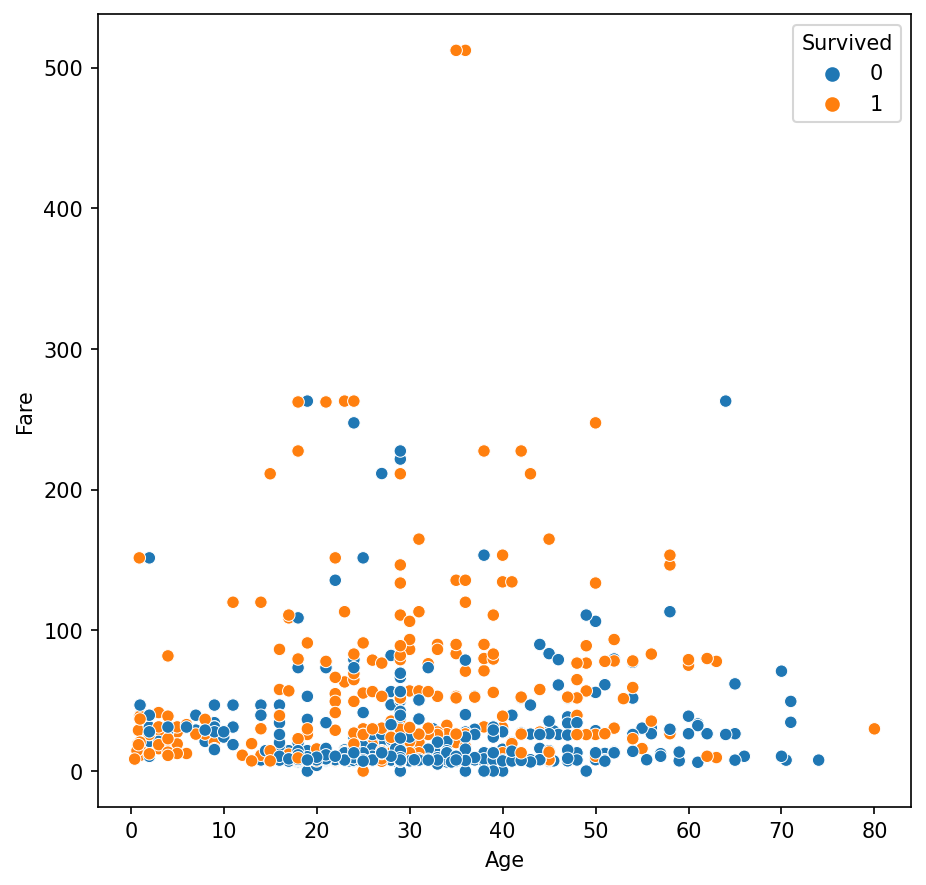

In [72]:
plt.figure(figsize=(7,7),dpi=150)
sns.scatterplot(data=df,y='Fare',x='Age',hue=y)

In [73]:
x = df.drop('Survived',axis=1)
y=df['Survived']

<AxesSubplot:xlabel='Age', ylabel='Fare'>

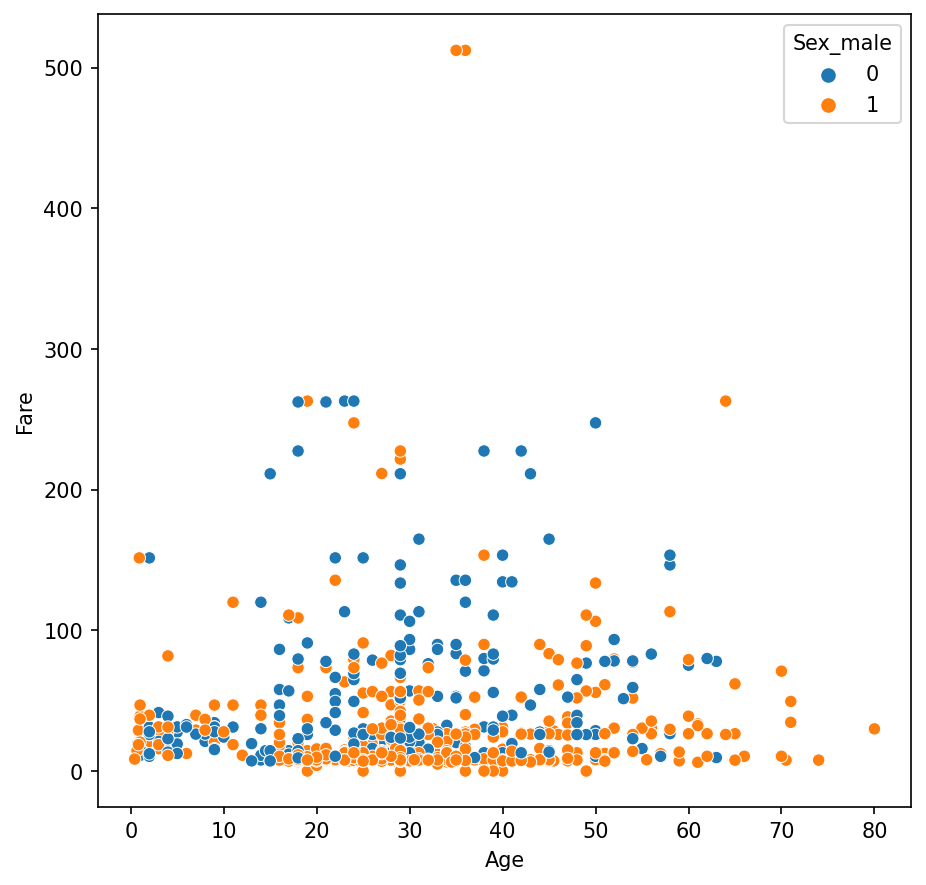

In [74]:
plt.figure(figsize=(7,7),dpi=150)
sns.scatterplot(data=df,y='Fare',x='Age',hue='Sex_male')

In [75]:
df.head(10)

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
5,0,3,29.0,8.4583,1
6,0,1,54.0,51.8625,1
7,0,3,2.0,21.0750,1
8,1,3,27.0,11.1333,0
9,1,2,14.0,30.0708,0


In [76]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [77]:
nbModel = GaussianNB()

In [78]:
nbModel.fit(xtrain,ytrain)

GaussianNB()

In [79]:
nbpred = nbModel.predict(xtest)

In [81]:
accuracy_score(nbpred,ytest)

0.7877094972067039

Therefore The Naive Bayes Model is **78.77%** Accurate while predicting survival rates in the Titanic survivors dataset

## Using SVMs